<a href="https://colab.research.google.com/github/udaydaspg/Convolutional-Neural-Network-Projects/blob/main/uday_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import glob
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                              batch_size = batch_size,
                                                              image_size = (img_height,img_width),
                                                              seed = 123,
                                                              validation_split = 0.2,
                                                              subset = "training")

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                              batch_size = batch_size,
                                                              image_size = (img_height,img_width),
                                                              seed = 123,
                                                              validation_split = 0.2,
                                                              subset = "validation")

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [ ]:
import matplotlib.pyplot as plt

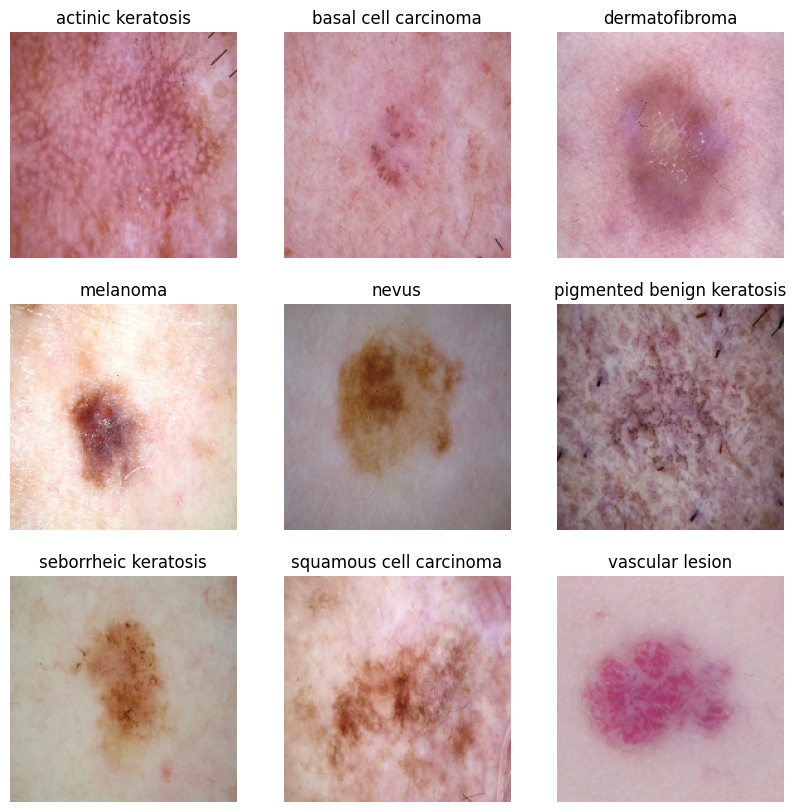

In [ ]:
### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
i=0
for images, labels in train_ds.take(1):
  while i<=9:
    for j in range(32):
      if labels[j].numpy() == i:
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[j].numpy().astype("uint8"))
        plt.title(class_names[labels[j].numpy()])
        plt.axis("off")

    i+=1




The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
rescaling_layer = Sequential([layers.Rescaling(1./255)])  # creation of layer for normalize pixel values between (0,1)

In [ ]:
### Your code goes here
num_classes = 9

model = Sequential([

  rescaling_layer,   # layer for normalize pixel values between (0,1)

  layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (batch_size,img_height,img_width,3)),   # firt CNN layer
  layers.MaxPooling2D((2,2)),   # Maxpooling layer
  layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),  # second hidden layer
  layers.MaxPooling2D((2,2)),   # Maxpooling layer
  layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),   # third hidden layer
  layers.MaxPooling2D((2,2)),   # Max pooling layer

  layers.Flatten(),
  layers.Dense(128, activation = 'relu'),
  layers.Dense(num_classes , activation = 'softmax')
])

model.build(input_shape = (batch_size,img_height,img_width,3))


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 180, 180, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 178, 178, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 89, 89, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 87, 87, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 43, 43, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 41, 41, 64)         

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 488s 2s/step - loss: 1.8820 - accuracy: 0.3064 - val_loss: 1.7280 - val_accuracy: 0.3557
Epoch 2/20
56/56 [==============================] - 2s 32ms/step - loss: 1.5860 - accuracy: 0.4453 - val_loss: 1.6223 - val_accuracy: 0.4407
Epoch 3/20
56/56 [==============================] - 2s 30ms/step - loss: 1.4517 - accuracy: 0.4978 - val_loss: 1.4939 - val_accuracy: 0.4855
Epoch 4/20
56/56 [==============================] - 2s 29ms/step - loss: 1.3962 - accuracy: 0.5100 - val_loss: 1.4132 - val_accuracy: 0.4609
Epoch 5/20
56/56 [==============================] - 2s 30ms/step - loss: 1.3291 - accuracy: 0.5469 - val_loss: 1.3978 - val_accuracy: 0.5034
Epoch 6/20
56/56 [==============================] - 2s 30ms/step - loss: 1.1997 - accuracy: 0.5815 - val_loss: 1.4495 - val_accuracy: 0.5078
Epoch 7/20
56/56 [==============================] - 2s 30ms/step - loss: 1.1193 - accuracy: 0.6060 - val_loss: 1.4277 - val_accuracy: 0.5324
Epoch 8/20
56

### Visualizing training results

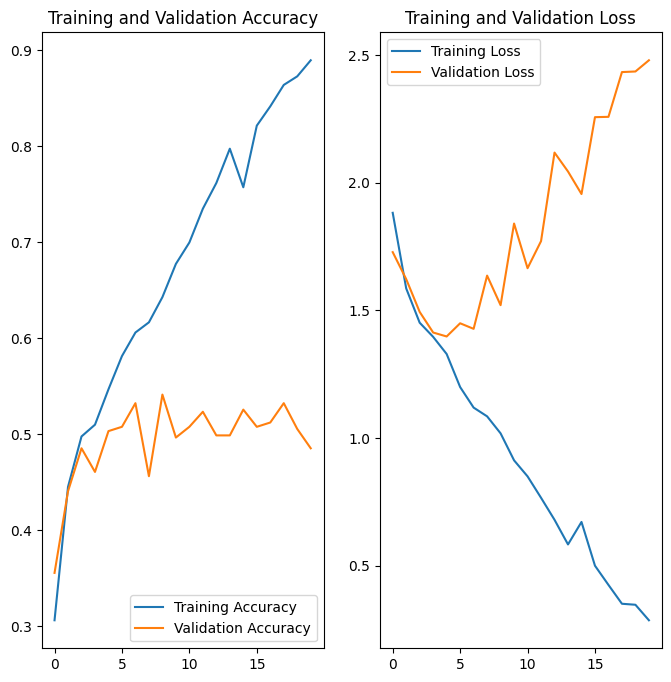

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Claerly it has been seen that the model is overfit in nature as the training accuracy is nearly 88% wheras the validation accuracy is likely only 48%. So, there is 40% difference in accuracy level between training and validation data.

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(1,.5,fill_mode="reflect",interpolation="bilinear",seed=None,fill_value=0.0),
    layers.RandomCrop(img_height,img_width),
  ]
)

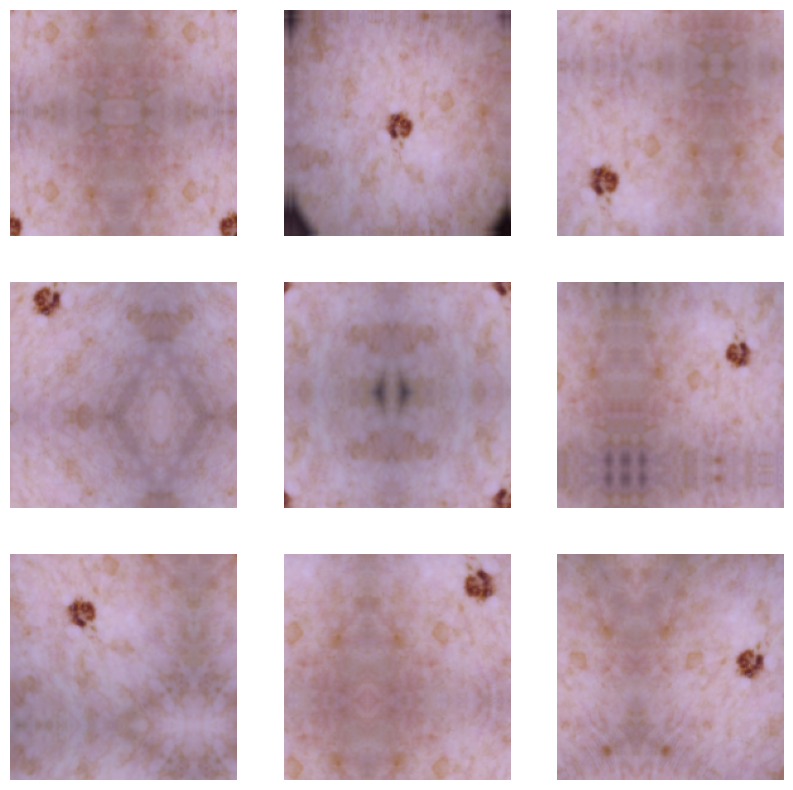

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([

  data_augmentation, # data augmentation layer
  rescaling_layer,   # layer for normalize pixel values between (0,1)

  layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),   # firt CNN layer
  layers.MaxPooling2D((2,2)),   # Maxpooling layer
  layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),  # second hidden layer
  layers.MaxPooling2D((2,2)),   # Maxpooling layer
  layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),   # third hidden layer
  layers.MaxPooling2D((2,2)),   # Max pooling layer

  layers.Dropout(0.2),          # Drop out layer added to reduce the overfitting effect

  layers.Flatten(),
  layers.Dense(128, activation = 'relu'),
  layers.Dense(num_classes , activation = 'softmax')
])

model.build(input_shape = (batch_size,img_height,img_width,3))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                 

### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 7s 59ms/step - loss: 2.0009 - accuracy: 0.2556 - val_loss: 1.8999 - val_accuracy: 0.2617
Epoch 2/20
56/56 [==============================] - 3s 51ms/step - loss: 1.7814 - accuracy: 0.3359 - val_loss: 1.7086 - val_accuracy: 0.3468
Epoch 3/20
56/56 [==============================] - 3s 56ms/step - loss: 1.7024 - accuracy: 0.3594 - val_loss: 1.6974 - val_accuracy: 0.3691
Epoch 4/20
56/56 [==============================] - 3s 52ms/step - loss: 1.6567 - accuracy: 0.3711 - val_loss: 1.6367 - val_accuracy: 0.3758
Epoch 5/20
56/56 [==============================] - 3s 54ms/step - loss: 1.6810 - accuracy: 0.3672 - val_loss: 1.6159 - val_accuracy: 0.4116
Epoch 6/20
56/56 [==============================] - 3s 49ms/step - loss: 1.6946 - accuracy: 0.3527 - val_loss: 1.6675 - val_accuracy: 0.3714
Epoch 7/20
56/56 [==============================] - 3s 49ms/step - loss: 1.6146 - accuracy: 0.3834 - val_loss: 1.6481 - val_accuracy: 0.3781
Epoch 8/20
56

### Visualizing the results

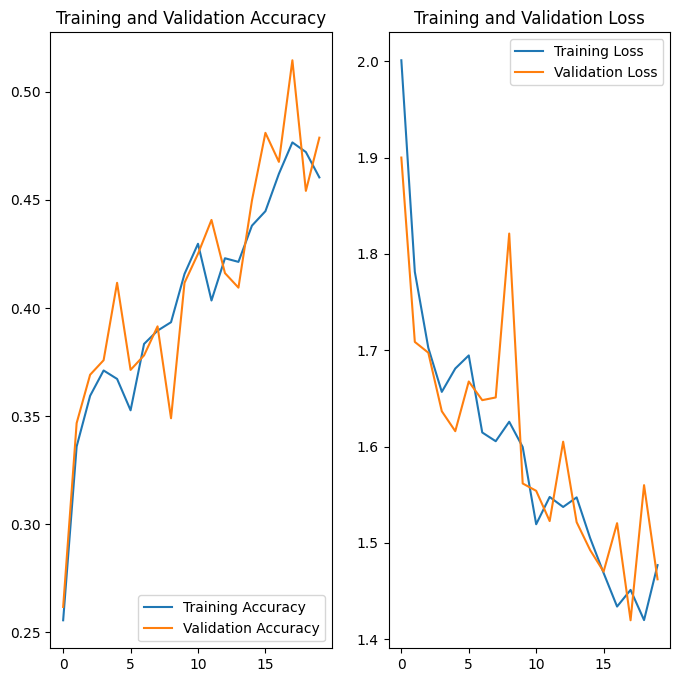

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

### It has now been seen that the accuracy of the model for the training dataset has significantly reduced nearly 47% wheras the validation accuracy is likely only 45% as earlier. So, clearly the overfitting effect has been mitigated with the help of dropout and data augmentation.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

Found 2239 files belonging to 9 classes.
class: 3  number : 438 (19.562%)
class: 7  number : 181 (8.084%)
class: 8  number : 139 (6.208%)
class: 5  number : 462 (20.634%)
class: 1  number : 376 (16.793%)
class: 4  number : 357 (15.945%)
class: 0  number : 114 (5.092%)
class: 6  number : 77 (3.439%)
class: 2  number : 95 (4.243%)


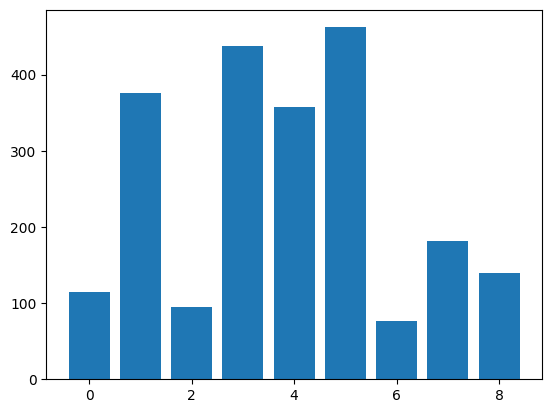

In [ ]:
original_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train)

df = []
for _ , labels in original_ds:
    for i in labels:
        df.append(i.numpy())

from collections import Counter

x = Counter(df)

for key, value in x.items():
    proportion = round(value*100/len(df),3)
    print(f"class: {key}  number : {value} ({proportion}%)")

plt.bar(x.keys(), x.values())
plt.show()

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?  - -  Class 6 has the least number of samples with only 77 (3.439%)
#### - Which classes dominate the data in terms proportionate number of samples?  - - Class 5 has dominated the whole data with 20.634% data


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset= "/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A474906F070>: 100%|██████████| 500/500 [00:18<00:00, 26.55 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A47490C3C40>: 100%|██████████| 500/500 [00:20<00:00, 24.24 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A47491C3DC0>: 100%|██████████| 500/500 [00:22<00:00, 22.72 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7A4749032C50>: 100%|██████████| 500/500 [01:32<00:00,  5.43 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7A474906F940>: 100%|██████████| 500/500 [01:32<00:00,  5.40 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A4749FEC9A0>: 100%|██████████| 500/500 [00:19<00:00, 25.06 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7A47495050F0>: 100%|██████████| 500/500 [00:41<00:00, 11.94 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A47493B3550>: 100%|██████████| 500/500 [00:18<00:00, 27.17 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A4749249F60>: 100%|██████████| 500/500 [00:19<00:00, 26.23 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [ ]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
1,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
2,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
3,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
4,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
...,...,...
2234,/content/gdrive/MyDrive/Skin cancer ISIC The I...,melanoma
2235,/content/gdrive/MyDrive/Skin cancer ISIC The I...,melanoma
2236,/content/gdrive/MyDrive/Skin cancer ISIC The I...,melanoma
2237,/content/gdrive/MyDrive/Skin cancer ISIC The I...,melanoma


In [ ]:
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027650.jpg_020a7bb7-89ef-4c5d-98b0-6d1b82bfbaa2.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030491.jpg_5cd49a7e-96cc-4f3c-b56c-51f399fb1db1.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026575.jpg_5445d7ec-a831-4c53-bf24-daa35021a97d.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027172.jpg_247f9515-d638-4905-a70f-d55f5162d069.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027536.jpg_042318cc-2c92

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = pd.concat([original_df,df2])

In [ ]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',     ## Todo choose the correct parameter value, so that only training data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
model = Sequential([

  rescaling_layer,   # layer for normalize pixel values between (0,1)

  layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),   # firt CNN layer
  layers.MaxPooling2D((2,2)),   # Maxpooling layer
  layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),  # second hidden layer
  layers.MaxPooling2D((2,2)),   # Maxpooling layer
  layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),   # third hidden layer
  layers.MaxPooling2D((2,2)),   # Max pooling layer

  layers.Dropout(0.2),          # Drop out layer added to reduce the overfitting effect

  layers.Flatten(),
  layers.Dense(128, activation = 'relu'),
  layers.Dense(num_classes , activation = 'softmax')
])

model.build(input_shape = (batch_size,img_height,img_width,3))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (32, 178, 178, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 89, 89, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 87, 87, 64)          18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 43, 43, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (32, 41, 41, 64)         

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
epochs = 20

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 44s 253ms/step - loss: 1.1198 - accuracy: 0.5877 - val_loss: 1.1788 - val_accuracy: 0.5813
Epoch 2/20
169/169 [==============================] - 43s 250ms/step - loss: 1.0383 - accuracy: 0.6256 - val_loss: 1.1542 - val_accuracy: 0.6043
Epoch 3/20
169/169 [==============================] - 44s 255ms/step - loss: 0.8877 - accuracy: 0.6790 - val_loss: 0.9501 - val_accuracy: 0.6785
Epoch 4/20
169/169 [==============================] - 46s 263ms/step - loss: 0.7271 - accuracy: 0.7359 - val_loss: 0.8900 - val_accuracy: 0.6867
Epoch 5/20
169/169 [==============================] - 47s 272ms/step - loss: 0.6848 - accuracy: 0.7574 - val_loss: 0.9972 - val_accuracy: 0.6437
Epoch 6/20
169/169 [==============================] - 43s 248ms/step - loss: 0.5456 - accuracy: 0.8045 - val_loss: 0.8322 - val_accuracy: 0.7313
Epoch 7/20
169/169 [==============================] - 44s 251ms/step - loss: 0.4828 - accuracy: 0.8244 - val_loss: 0.8101 - val_ac

#### **Todo:**  Visualize the model results

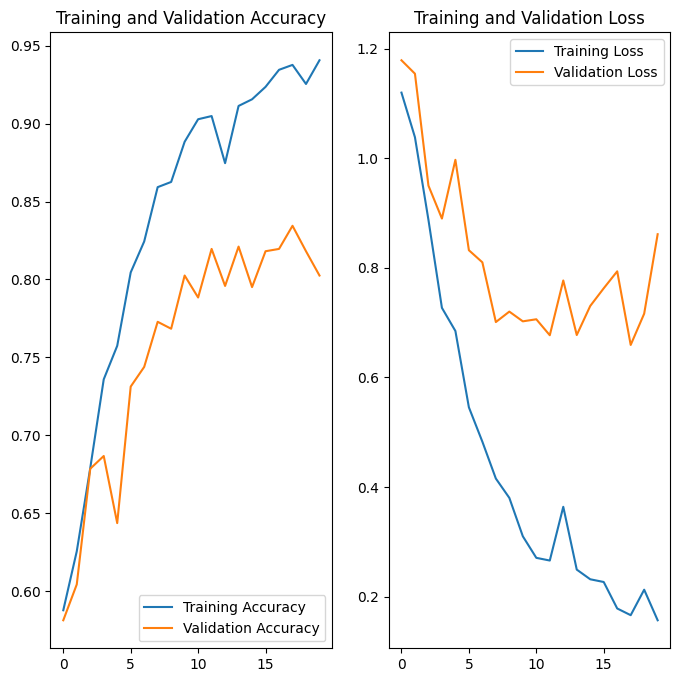

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



### After using augmentor by adding 500 pictures for each class, class imbalance is reduced and model results well for both training (94%) and validation (80%) dataset. Class rebalance helps to reduce the overfitting of model.